**Notebook análisis de datos imágenes de animales.**

Presentado por - Grupo 6:

    Alejandro Aristizabal
    Alexander Hernández Páez
    Juan David Rico
    Juan Felipe Jiménez

In [17]:
#!pip install opencv-python
#!pip install webcolors
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import os
import cv2
from sklearn.cluster import KMeans
import webcolors

In [10]:
df_train = pd.read_csv(r"C:\Users\alexh\OneDrive\Desktop\Maestria IA\Proyecto - Desarrollo de Soluciones\Repositorio_grupo_6\Proyecto-Desarrollo-de-Soluciones-Grupo6\data\groundtruth\csv\train_big_size_A_B_E_K_WH_WB.csv")
images_train = r'C:\Users\alexh\OneDrive\Desktop\Maestria IA\Proyecto - Desarrollo de Soluciones\Repositorio_grupo_6\Proyecto-Desarrollo-de-Soluciones-Grupo6\data\val'

In [3]:
df_train.head(15)

,Image,x1,y1,x2,y2,Label
0,L_07_05_16_DSC00126.JPG,2488,357,2520,427,3
1,L_07_05_16_DSC00126.JPG,1707,446,1746,471,3
2,L_07_05_16_DSC00127.JPG,2612,2314,2641,2361,3
3,L_07_05_16_DSC00127.JPG,1793,2450,1843,2475,3
4,L_07_05_16_DSC00150.JPG,1492,1381,1586,1441,2
5,L_07_05_16_DSC00150.JPG,1072,1354,1170,1401,2
6,L_07_05_16_DSC00150.JPG,897,1380,982,1447,2
7,L_07_05_16_DSC00150.JPG,827,1468,912,1534,2
8,L_07_05_16_DSC00150.JPG,1146,854,1240,915,2
9,L_07_05_16_DSC00150.JPG,1216,720,1272,770,2


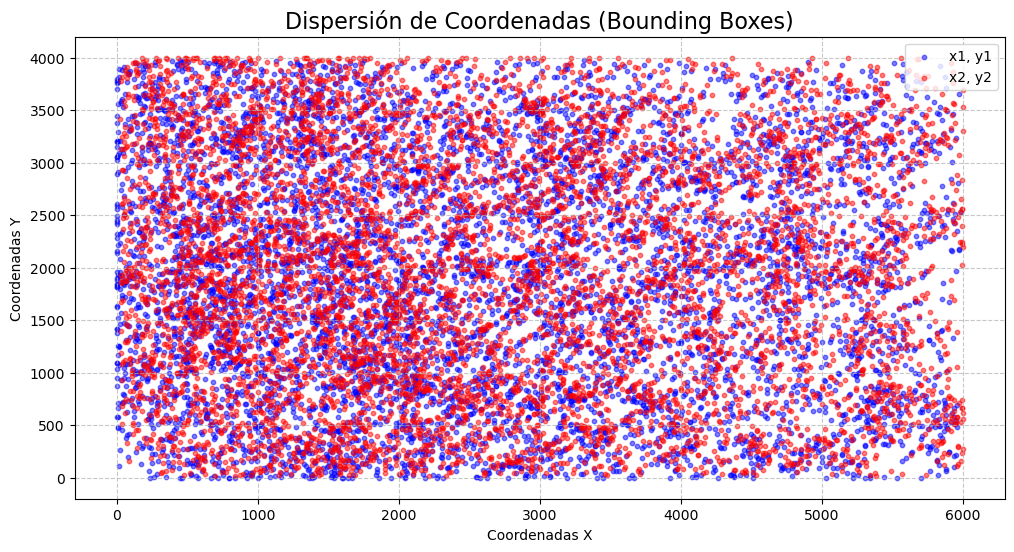

In [4]:
plt.figure(figsize = (12, 6))
plt.scatter(df_train['x1'], df_train['y1'], alpha=0.5, label = 'x1, y1', color = 'blue', s = 10)
plt.scatter(df_train['x2'], df_train['y2'], alpha=0.5, label = 'x2, y2', color = 'red', s = 10)
plt.title('Dispersión de Coordenadas (Bounding Boxes)', fontsize = 16)
plt.xlabel('Coordenadas X', fontsize = 10)
plt.ylabel('Coordenadas Y', fontsize = 10)
plt.legend()
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

In [5]:
df_train['x3'] = df_train['x1']
df_train['y3'] = df_train['y2']
df_train['x4'] = df_train['x2']
df_train['y4'] = df_train['y1']
df_train.head(15)

,Image,x1,y1,x2,y2,Label,x3,y3,x4,y4
0,L_07_05_16_DSC00126.JPG,2488,357,2520,427,3,2488,427,2520,357
1,L_07_05_16_DSC00126.JPG,1707,446,1746,471,3,1707,471,1746,446
2,L_07_05_16_DSC00127.JPG,2612,2314,2641,2361,3,2612,2361,2641,2314
3,L_07_05_16_DSC00127.JPG,1793,2450,1843,2475,3,1793,2475,1843,2450
4,L_07_05_16_DSC00150.JPG,1492,1381,1586,1441,2,1492,1441,1586,1381
5,L_07_05_16_DSC00150.JPG,1072,1354,1170,1401,2,1072,1401,1170,1354
6,L_07_05_16_DSC00150.JPG,897,1380,982,1447,2,897,1447,982,1380
7,L_07_05_16_DSC00150.JPG,827,1468,912,1534,2,827,1534,912,1468
8,L_07_05_16_DSC00150.JPG,1146,854,1240,915,2,1146,915,1240,854
9,L_07_05_16_DSC00150.JPG,1216,720,1272,770,2,1216,770,1272,720


C:\Users\alexh\AppData\Local\Temp\ipykernel_20036\688855617.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(labels))


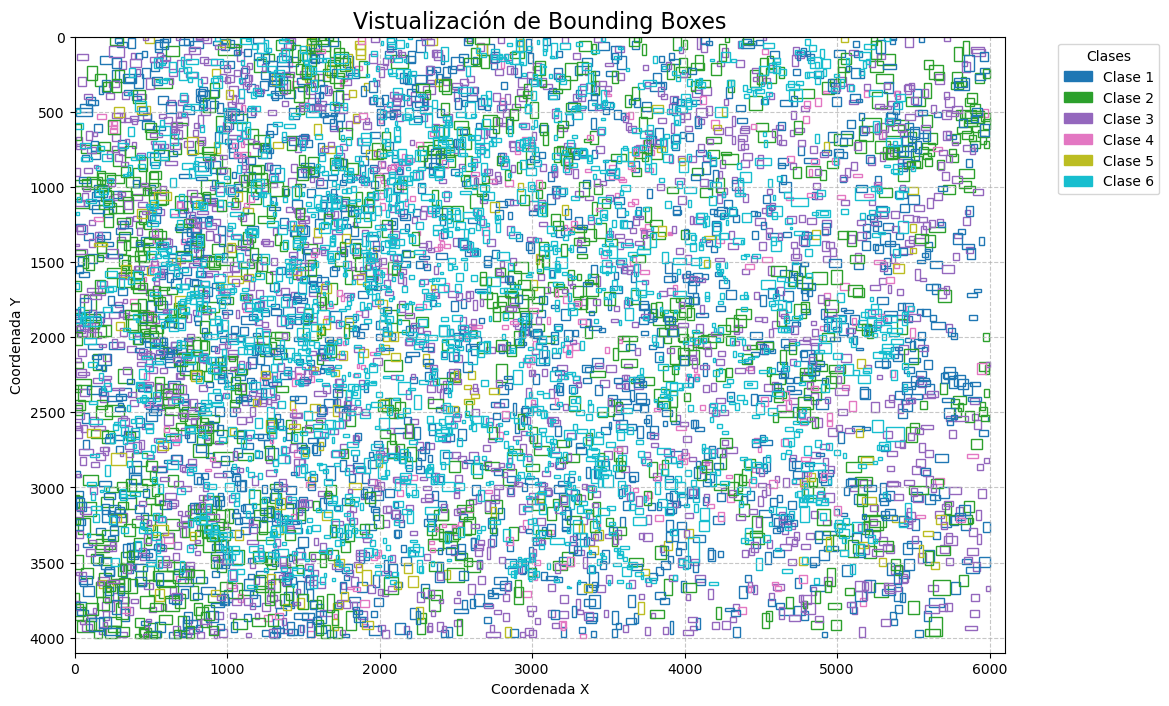

In [6]:
labels = sorted(df_train['Label'].unique())
colors = cm.get_cmap('tab10', len(labels))
color_map = {label: colors(i) for i, label in enumerate(labels)}

fig, ax = plt.subplots(figsize = (12, 8))
for _, row in df_train.iterrows():
    rect = patches.Rectangle(
        (row['x1'], row['y1']),
        row['x2'] - row['x1'],
        row['y2'] - row['y1'],
        linewidth = 1,
        edgecolor = color_map[row['Label']],
        facecolor = 'none'
    )
    ax.add_patch(rect)
    
legend_patches = [patches.Patch(color = color_map[label], label = f'Clase {label}') for label in labels]
ax.legend(handles = legend_patches, title = 'Clases', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    
ax.set_title('Vistualización de Bounding Boxes', fontsize = 16)
ax.set_xlabel('Coordenada X', fontsize = 10)
ax.set_ylabel('Coordenada Y', fontsize = 10)
ax.set_xlim(0, df_train[['x1', 'x2']].values.max()+100)
ax.set_ylim(0, df_train[['y1', 'y2']].values.max()+100)
plt.gca().invert_yaxis()
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

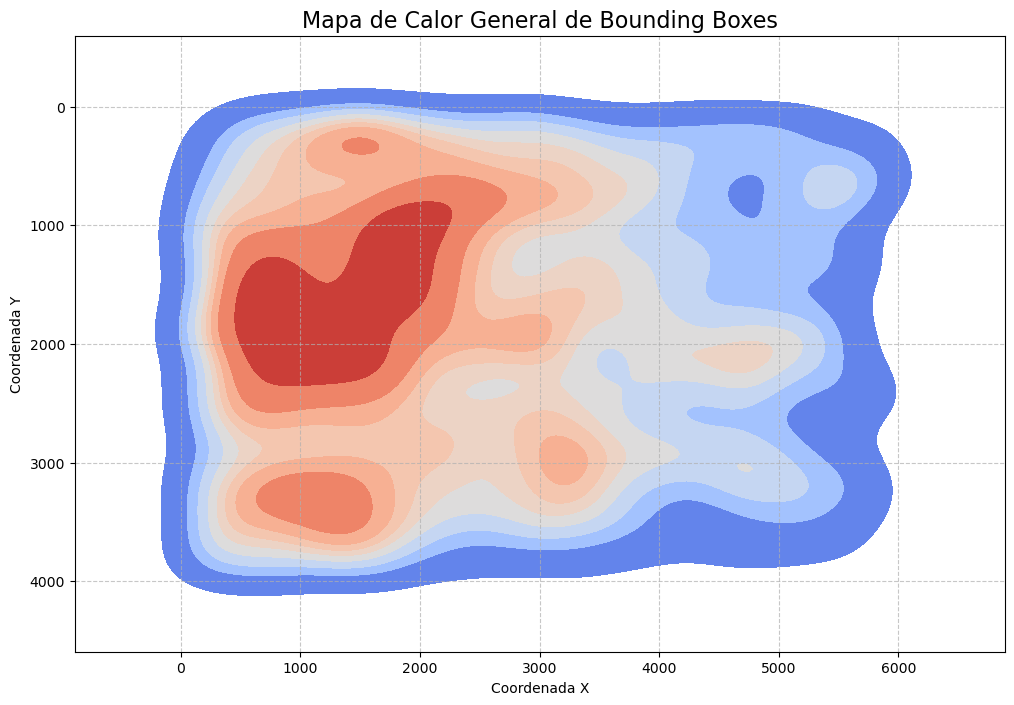

In [12]:
plt.figure(figsize = (12, 8))

#Cálculo del centroide de cada bounding box:
df_train['center_x'] = (df_train['x1'] +df_train['x2']) / 2
df_train['center_y'] = (df_train['y1'] +df_train['y2']) / 2

sns.kdeplot(
    x = df_train['center_x'],
    y = df_train['center_y'],
    cmap = 'coolwarm',
    fill = True,
    bw_adjust = 0.8
)

plt.title('Mapa de Calor General de Bounding Boxes', fontsize = 16)
plt.xlabel('Coordenada X', fontsize = 10)
plt.ylabel('Coordenada Y', fontsize = 10)
plt.gca().invert_yaxis()
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

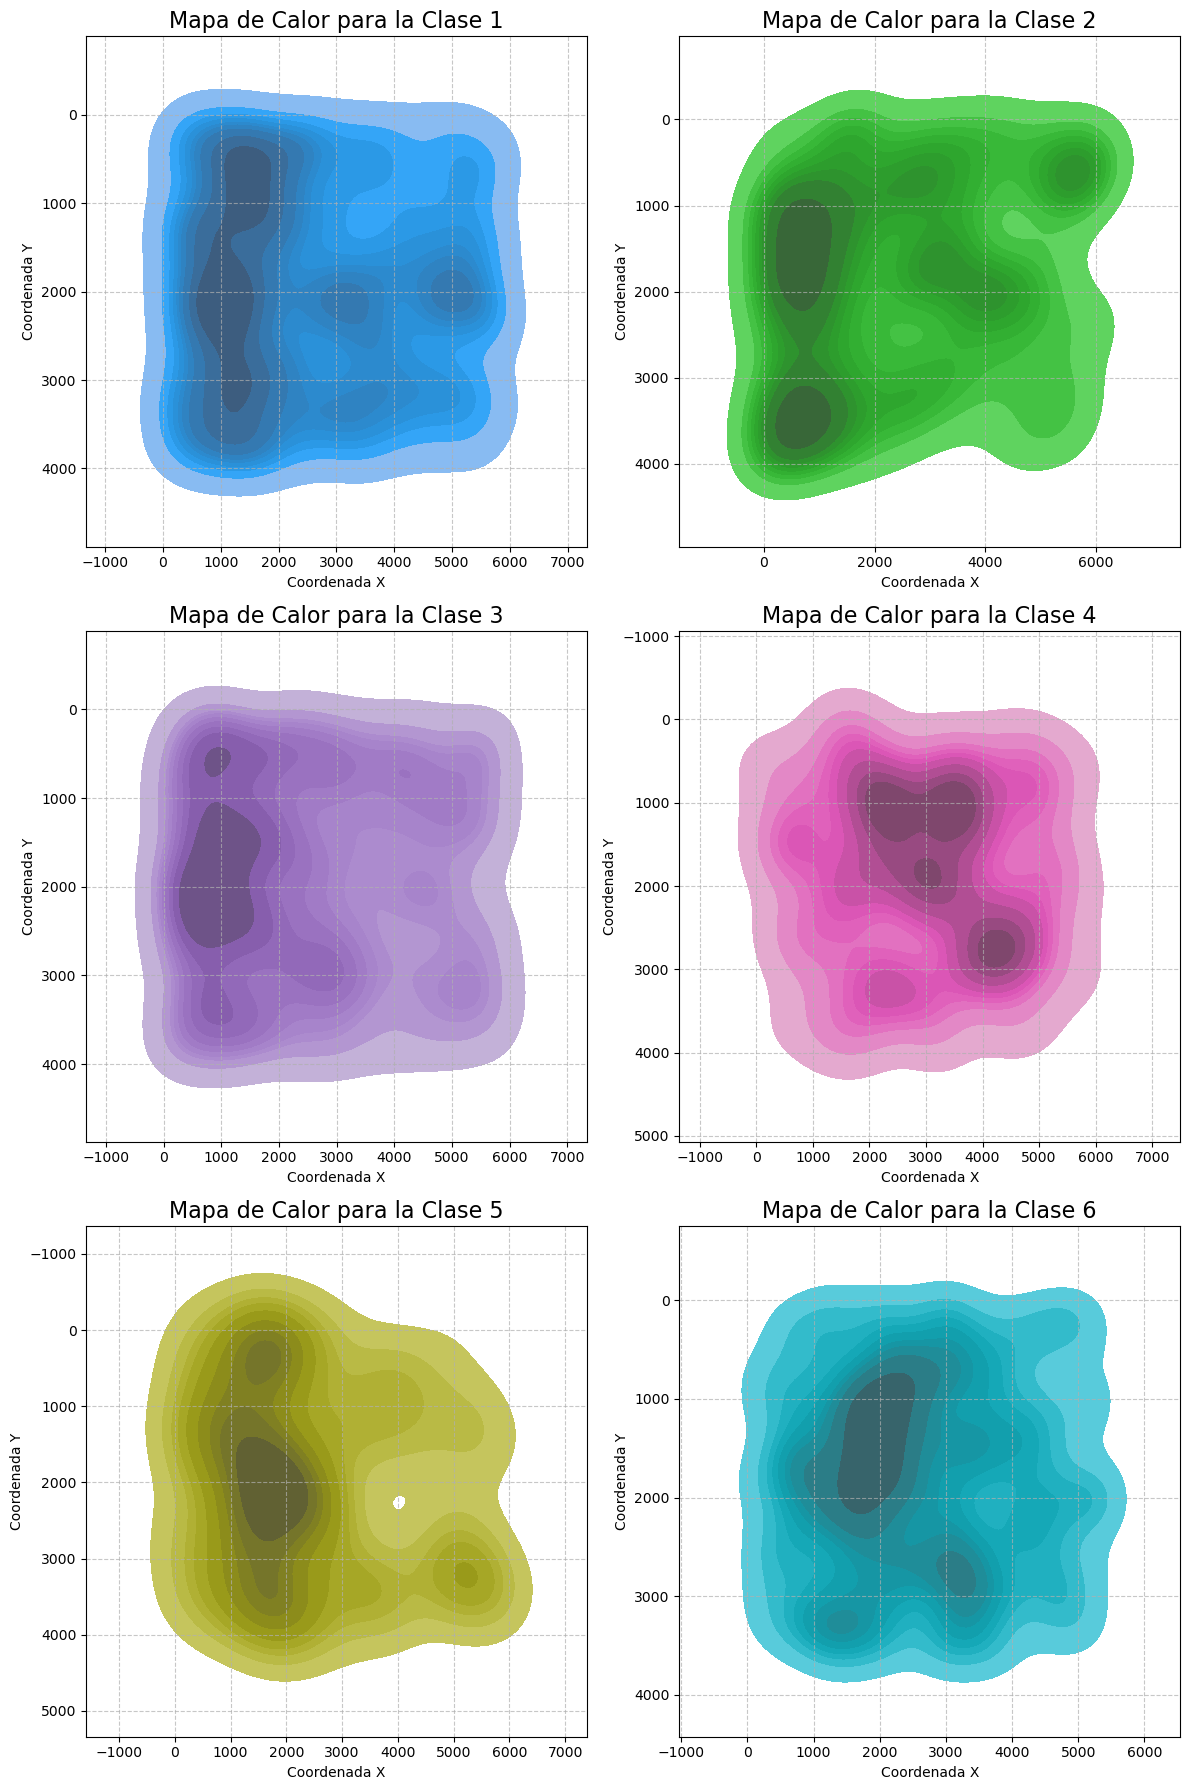

In [8]:
n_cols = 2
n_rows = (len(labels)+ n_cols - 1) // n_cols

fig, axs = plt.subplots(nrows = n_rows, ncols = n_cols, figsize = (12, 6 * n_rows))
axs = axs.flatten()

for i, label in enumerate(labels):
    ax = axs[i] if len(labels) > 1 else axs
    plt.sca(ax)
    
    class_data = df_train[df_train['Label'] == label]
    
    sns.kdeplot(
        x = class_data['center_x'],
        y = class_data['center_y'],
        fill = True,
        bw_adjust = 0.9,
        color = color_map[label][:5]
    )
    ax.set_title(f'Mapa de Calor para la Clase {label}', fontsize = 16)
    ax.set_xlabel('Coordenada X', fontsize = 10)
    ax.set_ylabel('Coordenada Y', fontsize = 10)
    ax.invert_yaxis()
    ax.grid(True, linestyle = '--', alpha = 0.7)
    
plt.tight_layout()
plt.show()

C:\Users\alexh\anaconda3_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexh\anaconda3_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexh\anaconda3_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\alexh\anaconda3_1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

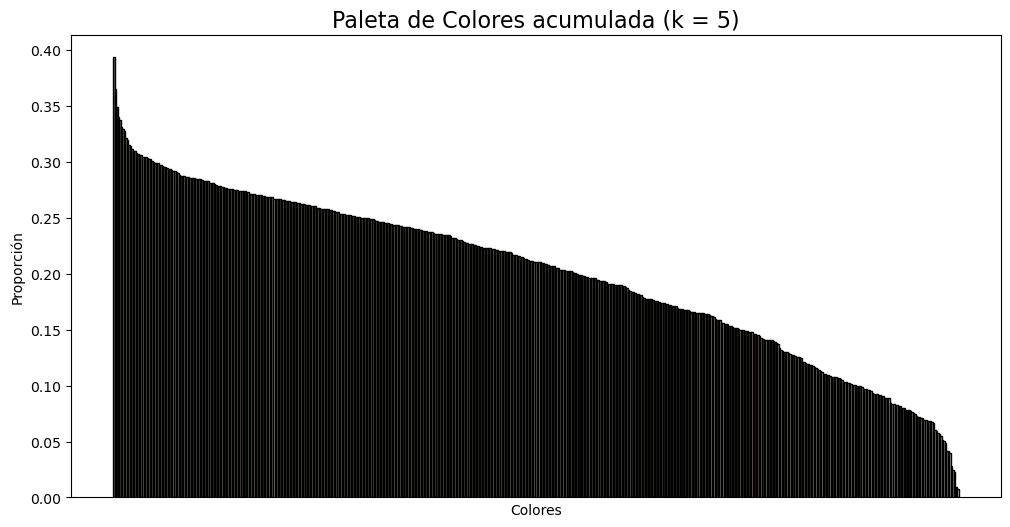

In [11]:
def extract_colors(image_path, k = 5):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pixels = image.reshape(-1, 3)
    
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(pixels)
    
    colors = kmeans.cluster_centers_.astype(int)
    labels, counts = np.unique(kmeans.labels_, return_counts = True)
    proportions = counts / counts.sum()
    
    return colors, proportions

def process_train_folder(folder_path, k = 5):
    accumulated_colors = []
    accumulated_proportions = []
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.png', '.jepg')):
            image_path = os.path.join(folder_path, filename)
            colors, proportions = extract_colors(image_path, k = k)
            accumulated_colors.append(colors)
            accumulated_proportions.append(proportions)
            
    accumulated_colors = np.vstack(accumulated_colors)
    accumulated_proportions = np.hstack(accumulated_proportions)
    return accumulated_colors, accumulated_proportions

def plot_color_palette(colors, proportions, k = 5):
    sorted_indices = np.argsort(proportions)[::-1]
    colors = colors[sorted_indices]
    proportions = proportions[sorted_indices]
    
    plt.figure(figsize = (12, 6))
    for i, (color, proportion) in enumerate(zip(colors, proportions)):
        plt.bar(i, proportion, color = color/255, edgecolor = 'black', width = 1)
    
    plt.title(f'Paleta de Colores acumulada (k = {k})', fontsize = 16)
    plt.xlabel('Colores', fontsize = 10)
    plt.ylabel('Proporción', fontsize = 10)
    plt.xticks([])
    plt.show()
    
train_folder_path = images_train

k = 5
train_colors, train_proportions = process_train_folder(train_folder_path, k = k)

plot_color_palette(train_colors, train_proportions, k = k)

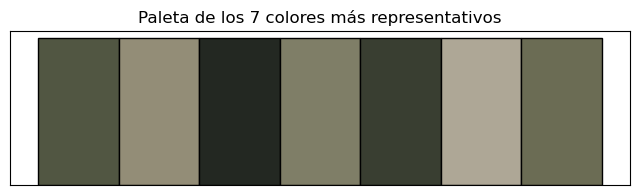

In [20]:
def get_top_colors(colors, proportions, n_colors = 7):
    weighted_colors = np.repeat(colors, (proportions * 1000).astype(int), axis = 0)
    kmeans = KMeans(n_clusters=n_colors, random_state = 42, n_init = 10)
    kmeans.fit(weighted_colors)
    
    return kmeans.cluster_centers_.astype(int)

def plot_top_colors(colors):
    plt.figure(figsize = (8, 2))
    for i, color in enumerate(colors):
        plt.bar(i, 1, color = color/255, edgecolor = 'black', width = 1)
        
    plt.title("Paleta de los 7 colores más representativos")
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
top_colors = get_top_colors(train_colors, train_proportions, n_colors=7)

plot_top_colors(top_colors)

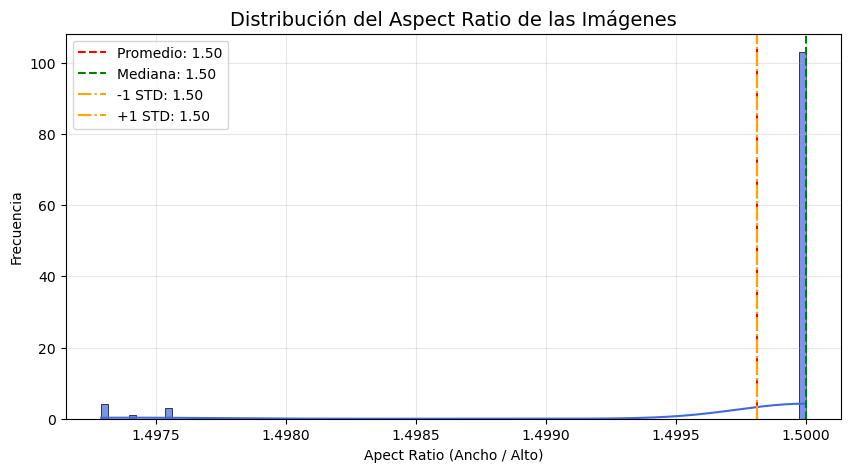

In [29]:
def calculate_aspect_ratios(folder_path):
    aspect_ratios = []
    
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                h,w = image.shape[:2]
                aspect_ratio = w/h
                aspect_ratios.append(aspect_ratio)
                
    return aspect_ratios

folder_path_1 = images_train

aspect_ratios = calculate_aspect_ratios(folder_path_1)

mean_aspect_ratio = np.mean(aspect_ratios)

median_aspect_ratio = np.median(aspect_ratios)

std_aspect_ratio = np.std(aspect_ratios)

plt.figure(figsize = (10, 5))
sns.histplot(aspect_ratios, bins = 100, kde = True, color = 'royalblue', alpha = 0.7)

plt.axvline(mean_aspect_ratio, color = 'red', linestyle = '--', label = f'Promedio: {mean_aspect_ratio:.2f}')
plt.axvline(median_aspect_ratio, color = 'green', linestyle = '--', label = f'Mediana: {median_aspect_ratio:.2f}')
plt.axvline(mean_aspect_ratio, color = 'orange', linestyle = '-.', label = f'-1 STD: {(mean_aspect_ratio - std_aspect_ratio):.2f}')
plt.axvline(mean_aspect_ratio, color = 'orange', linestyle = '-.', label = f'+1 STD: {(mean_aspect_ratio + std_aspect_ratio):.2f}')

plt.xlabel('Apect Ratio (Ancho / Alto)', fontsize = 10)
plt.ylabel('Frecuencia', fontsize = 10)
plt.title('Distribución del Aspect Ratio de las Imágenes', fontsize = 14)
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

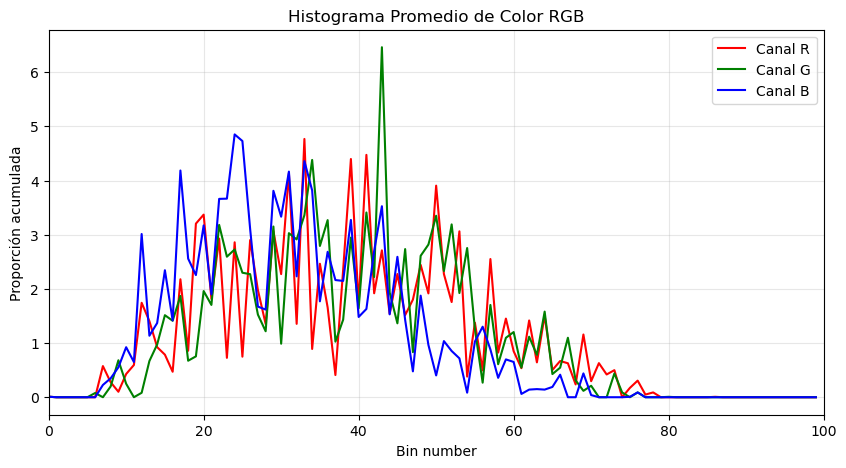

In [34]:
def compute_average_histogram_from_palette(colors, proportions, bins = 100):
    hist_list = [np.zeros(bins) for _ in range(3)]
    
    for i, color in enumerate(colors):
        for channel in range(3):
            bin_index = int((color[channel] / 255) * (bins - 1))
            hist_list[channel][bin_index] += proportions[i]
            
    return hist_list

bins = 100
avg_hist_palette = compute_average_histogram_from_palette(train_colors, train_proportions, bins)

plt.figure(figsize = (10, 5))
colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    plt.plot(avg_hist_palette[i], color = color, label = f'Canal {color.upper()}')
    
plt.title('Histograma Promedio de Color RGB')
plt.xlabel('Bin number')
plt.ylabel('Proporción acumulada')
plt.xlim([0, bins])
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

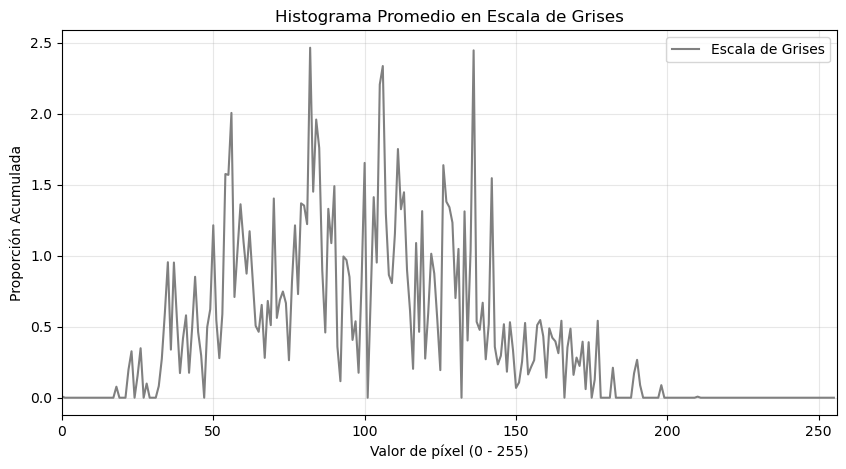

In [41]:
def rgb_to_grayscale(rgb):
    return 0.2989 * rgb[:, 0] + 0.5870 * rgb[:, 1] + 0.1140 * rgb[:, 2]

def compute_grayscale_histogram_from_palette(colors, proportions, bins = 256):
    grayscale_values = rgb_to_grayscale(colors)
    hist = np.zeros(bins)
    
    for i, gray_value in enumerate(grayscale_values):
        bin_index = int((gray_value / 255) * (bins - 1))
        hist[bin_index] += proportions[i]
        
    return hist

bins = 256

gray_hist_palette = compute_grayscale_histogram_from_palette(train_colors, train_proportions, bins)

plt.figure (figsize = (10, 5))
plt.plot(gray_hist_palette, color = 'gray', label = 'Escala de Grises')
plt.title('Histograma Promedio en Escala de Grises')
plt.xlabel('Valor de píxel (0 - 255)')
plt.ylabel('Proporción Acumulada')
plt.xlim([0, bins])
plt.legend()
plt.grid(alpha = 0.3)
plt.show()

In [ ]:
()